In [ ]:

from google.colab import drive
drive.mount('/content/drive')



import  pandas as pd
import  numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_patha = "/content/drive/MyDrive/cats_and_dogs_filtered"
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)


train_genrator = datagen.flow_from_directory(
    train_patha,
    target_size = (150,150),
    batch_size = 32,
    class_mode = "binary",
    subset = "training"
    )

val_genrator = datagen.flow_from_directory(
    train_patha,
    target_size = (150,150),
    batch_size = 32,
    class_mode = "binary",
    subset = "validation"
)

model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)),
    MaxPool2D((2,2)),

    Conv2D(64,(3,3),activation="relu",input_shape=(150,150,3)),
    MaxPool2D((2,2)),

    Conv2D(128,(3,3),activation="relu",input_shape=(150,150,3)),
    MaxPool2D((2,2)),

    Flatten(),
    Dense(512,activation="relu"),
    Dropout(0.5),
    Dense(1,activation="sigmoid")

])
model.compile(optimizer="adam",loss= "binary_crossentropy",metrics=["accuracy"])

history = model.fit(train_genrator,epochs=1,validation_data=val_genrator)


Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.6208 - loss: 0.7081 - val_accuracy: 0.6667 - val_loss: 0.6406


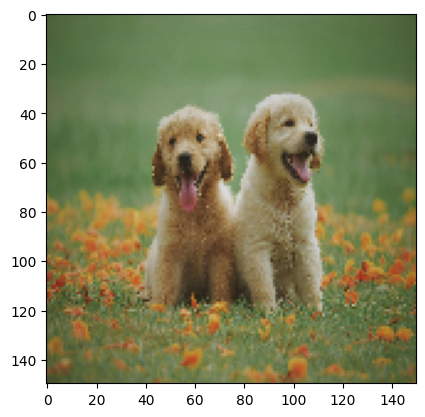

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Prediction: 🐱 Cat


In [ ]:
import matplotlib.pyplot as plt
img = image.load_img("/content/drive/MyDrive/pexels-photo-1108099.jpeg", target_size=(150,150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
plt.imshow(img_array[0])
plt.show()
prediction = model.predict(img_array)[0][0]
if prediction < 0.5:
    print("Prediction: 🐱 Cat")
else:
    print("Prediction: 🐶 Dog ")